# Blood Pressure

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import os
from operator import itemgetter

123456789-7885-MDC_PRESS_BLD_ART_ABP-125.csv:


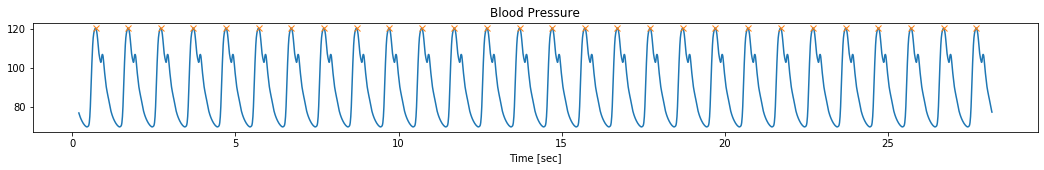

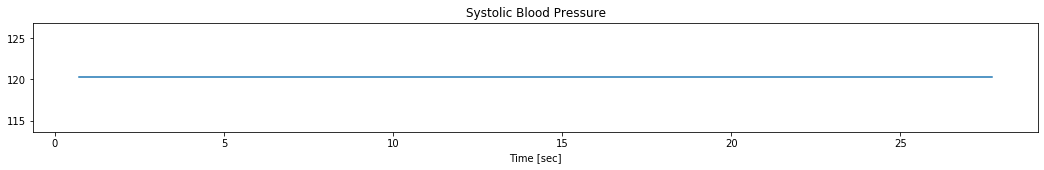

123456789-7891-MDC_PRESS_BLD_ART_ABP-125.csv:


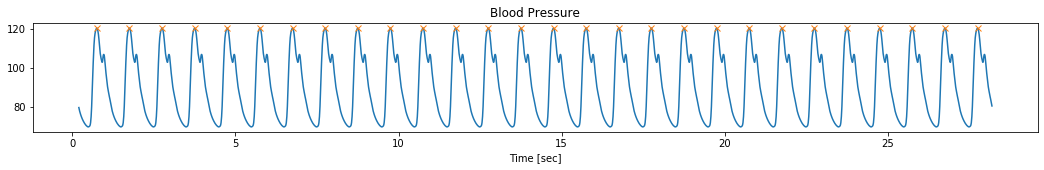

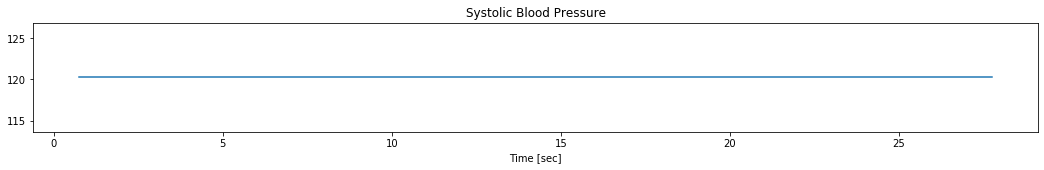

123456789-7899-MDC_PRESS_BLD_ART_ABP-125.csv:


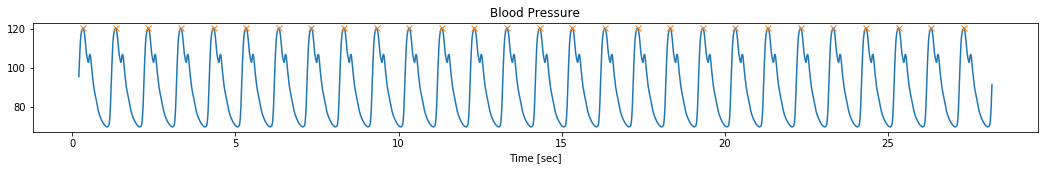

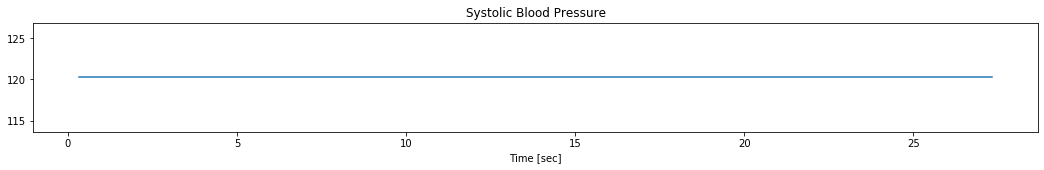

123456789-7917-MDC_PRESS_BLD_ART_ABP-125.csv:


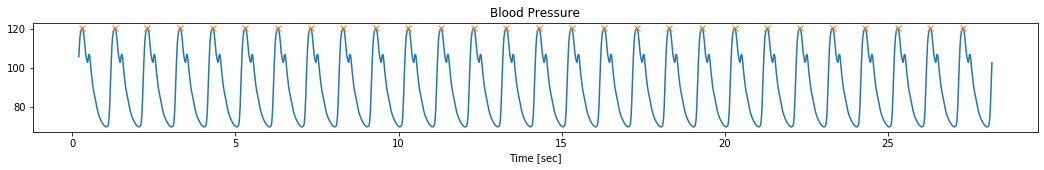

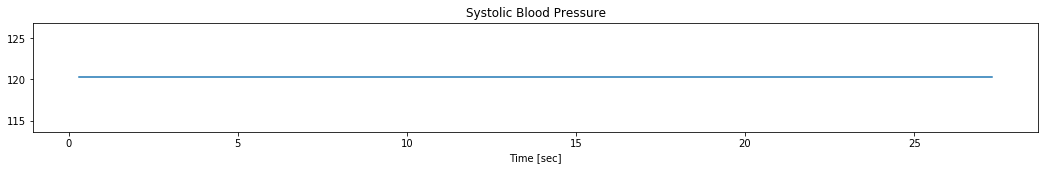

1887524-1979-MDC_PRESS_BLD_ART_ABP-125.csv:


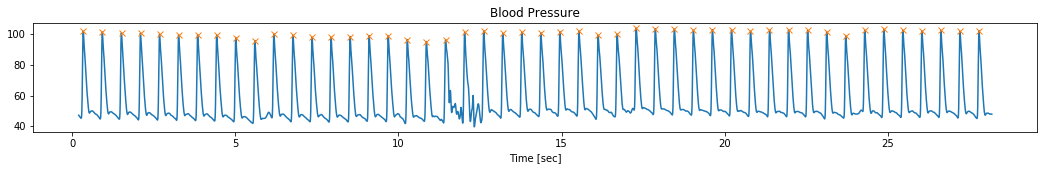

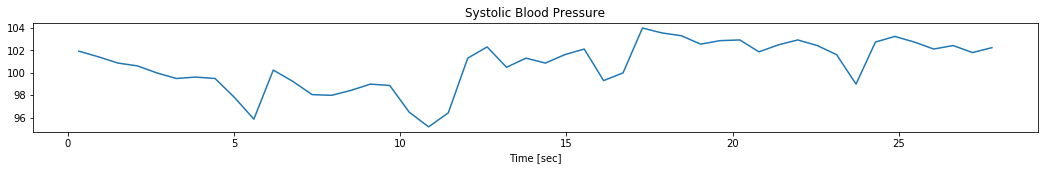

1986951-5721-MDC_PRESS_BLD_ART_ABP-125.csv:


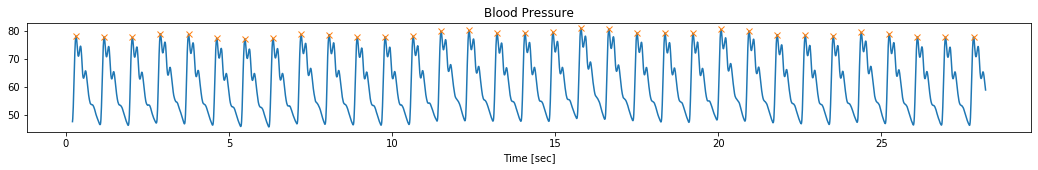

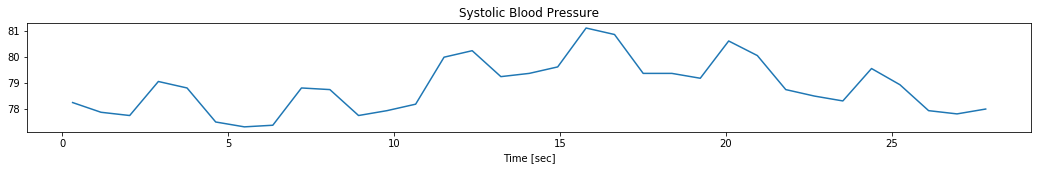

2175591-9564-MDC_PRESS_BLD_ART_ABP-125.csv:


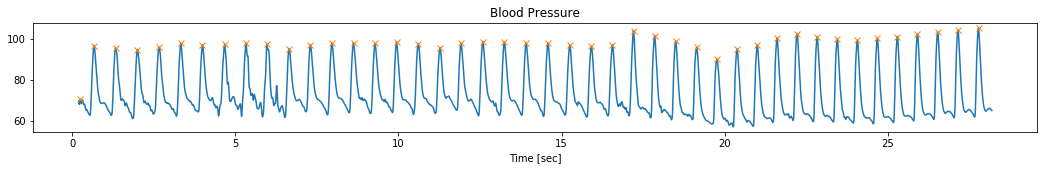

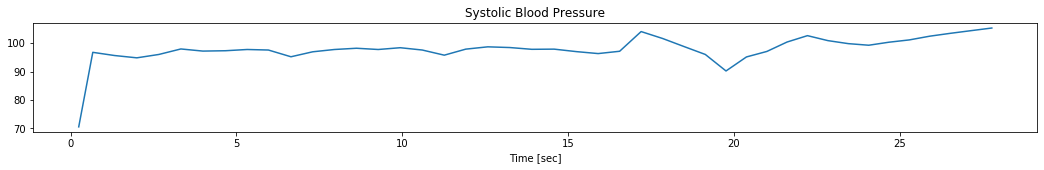

2677398-3033-MDC_PRESS_BLD_ART_ABP-125.csv:


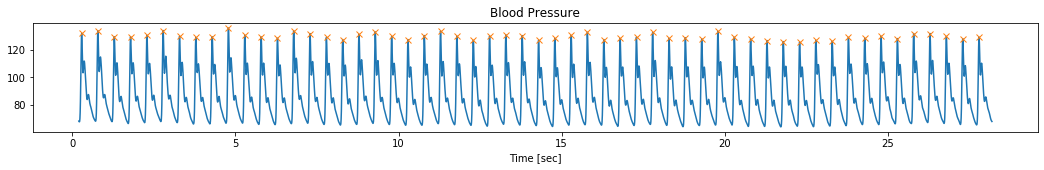

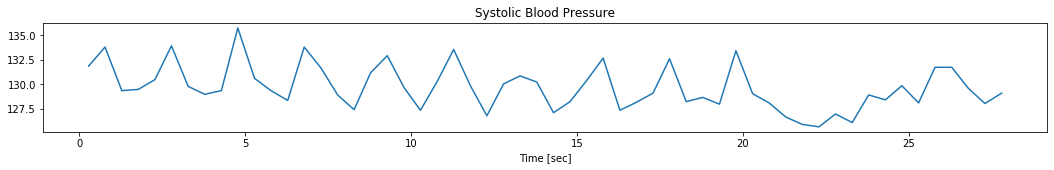

268269-2358-MDC_PRESS_BLD_ART_ABP-125.csv:


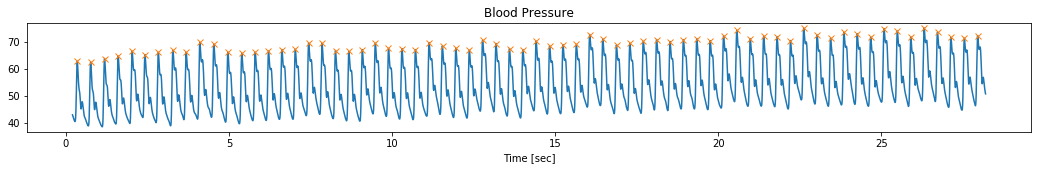

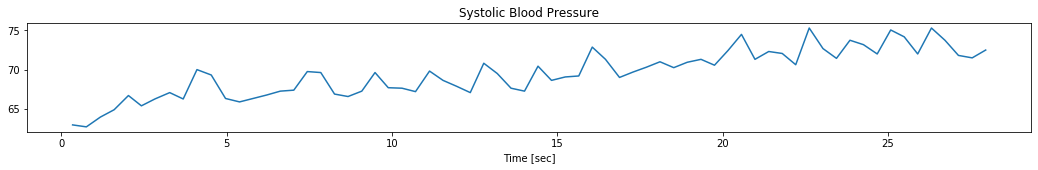

268269-2406-MDC_PRESS_BLD_ART_ABP-125.csv:


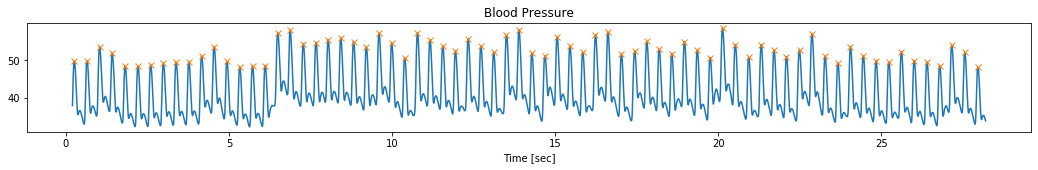

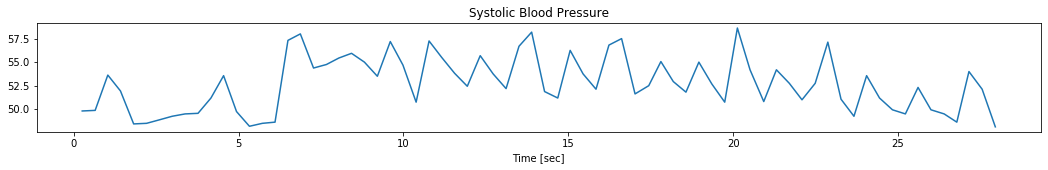

268269-2424-MDC_PRESS_BLD_ART_ABP-125.csv:


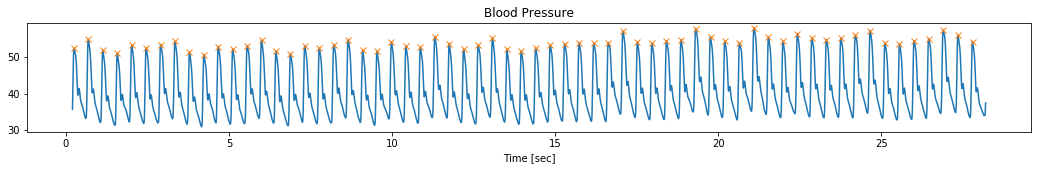

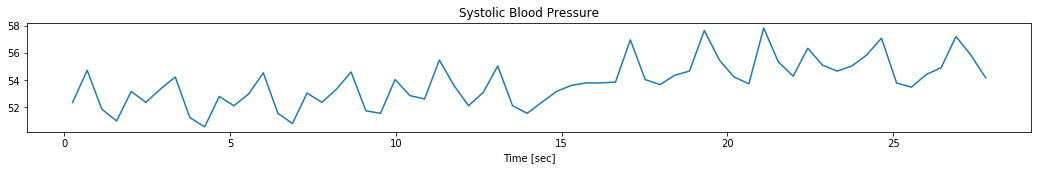

268269-2425-MDC_PRESS_BLD_ART_ABP-125.csv:


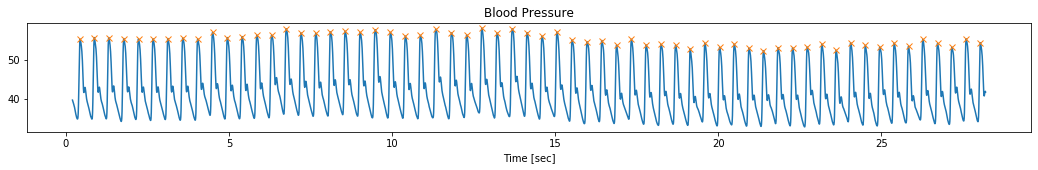

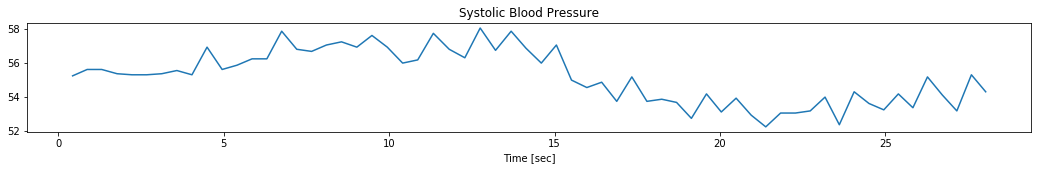

268269-2426-MDC_PRESS_BLD_ART_ABP-125.csv:


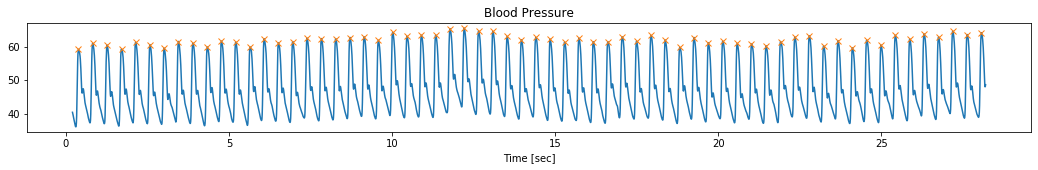

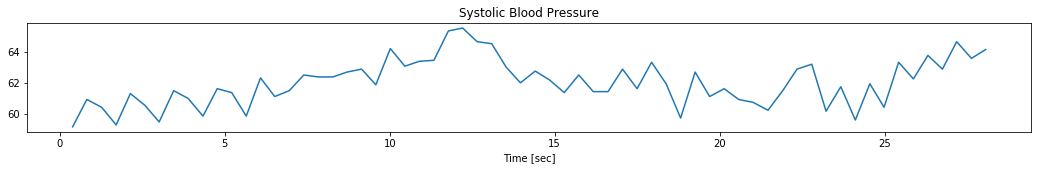

268269-2427-MDC_PRESS_BLD_ART_ABP-125.csv:


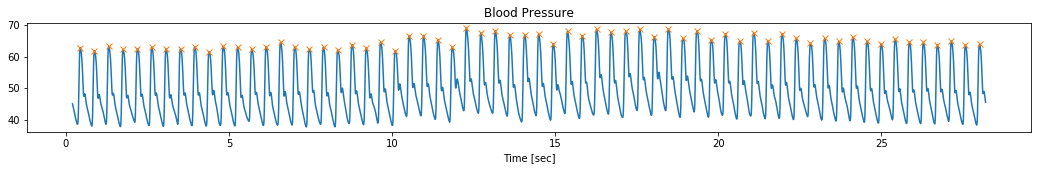

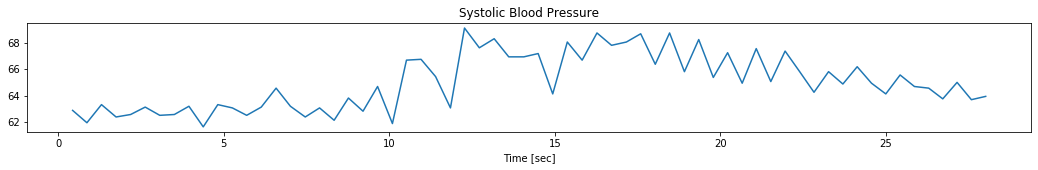

268269-2428-MDC_PRESS_BLD_ART_ABP-125.csv:


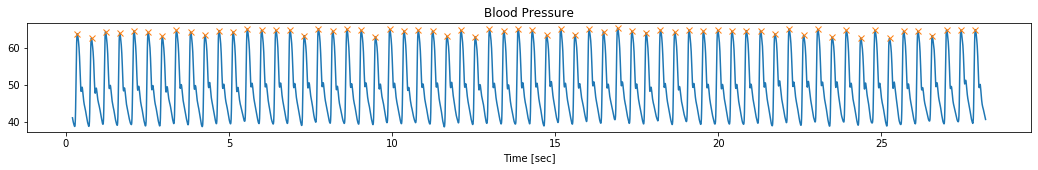

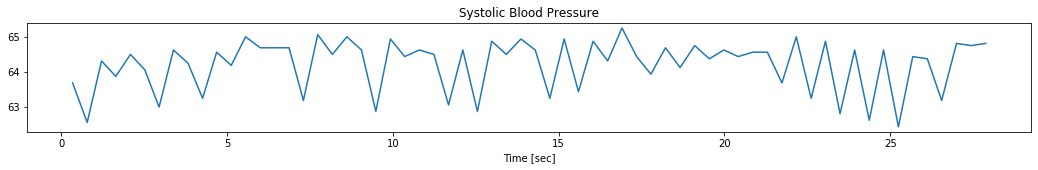

268269-2429-MDC_PRESS_BLD_ART_ABP-125.csv:


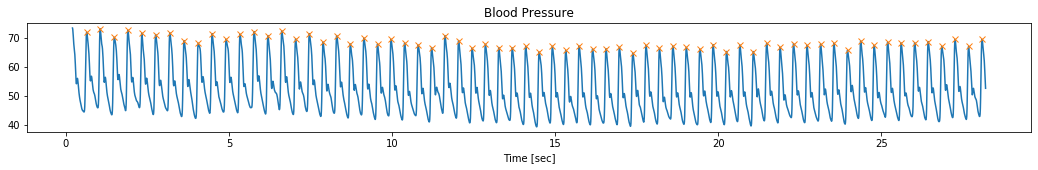

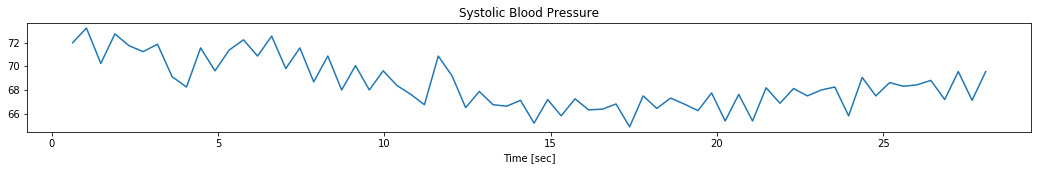

268269-2430-MDC_PRESS_BLD_ART_ABP-125.csv:


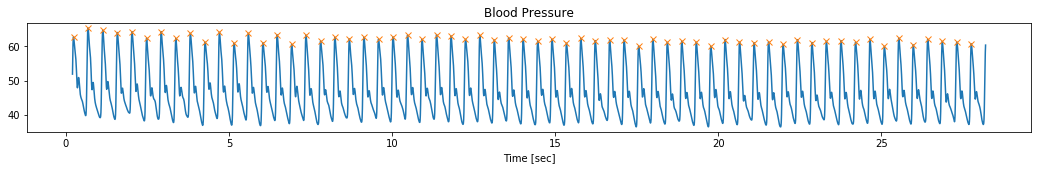

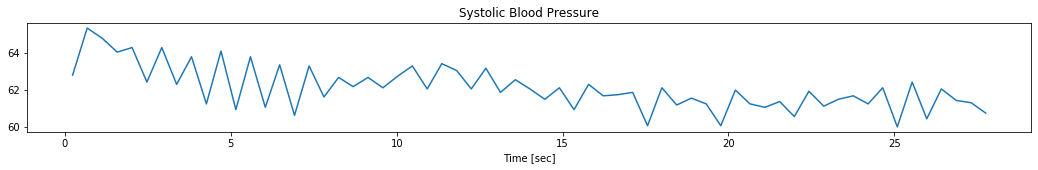

268269-2431-MDC_PRESS_BLD_ART_ABP-125.csv:


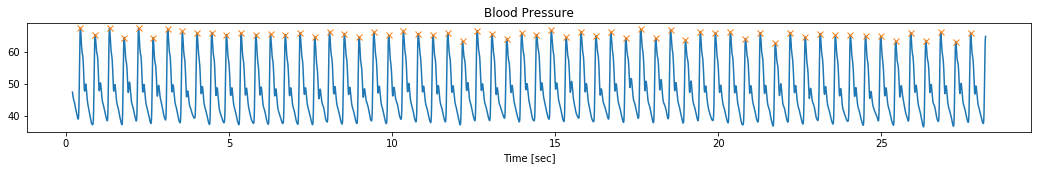

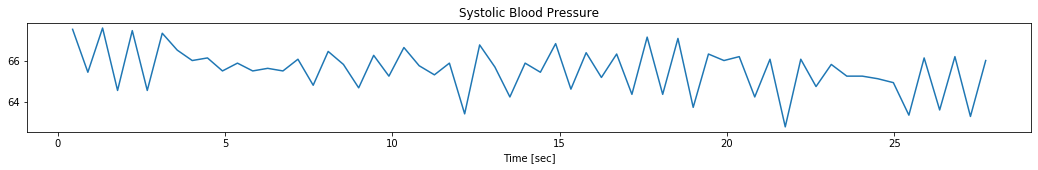

2784152-1242-MDC_PRESS_BLD_ART_ABP-125.csv:


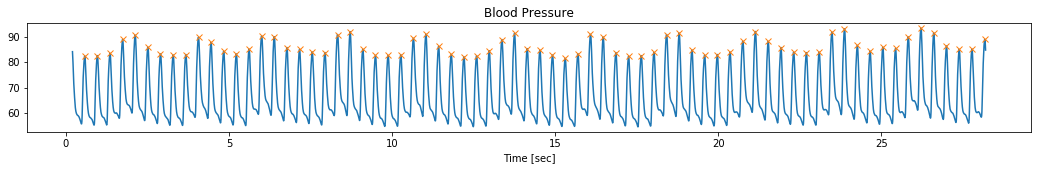

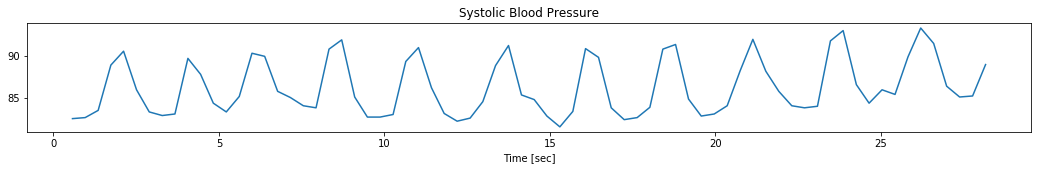

2784152-1275-MDC_PRESS_BLD_ART_ABP-125.csv:


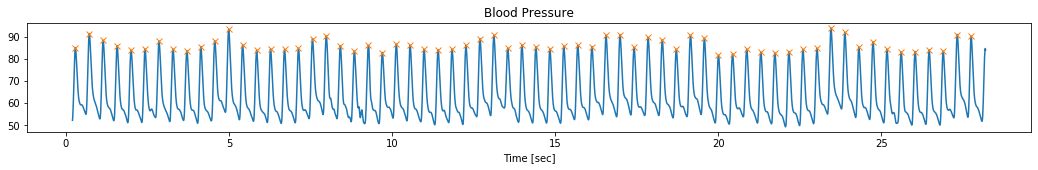

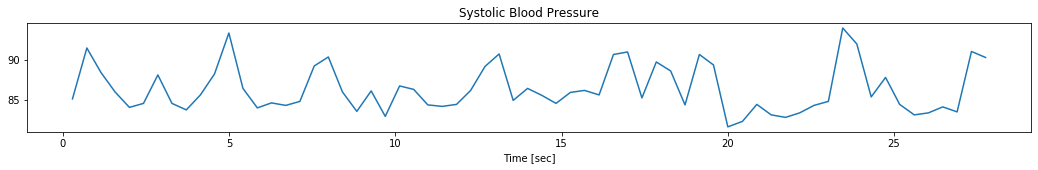

5047636-1580-MDC_PRESS_BLD_ART_ABP-125.csv:


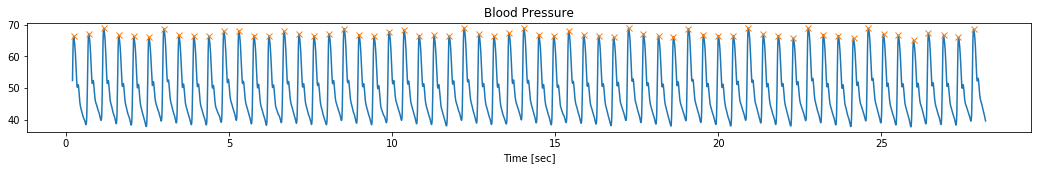

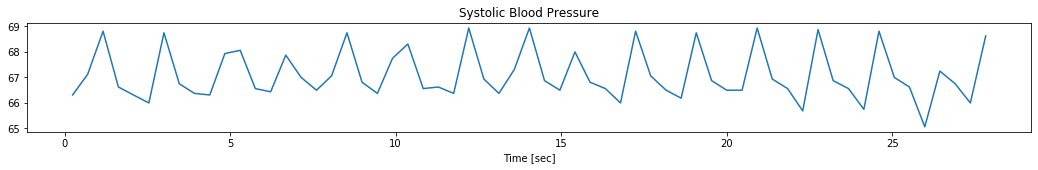

In [2]:
START_POINT=25
END_POINT=3525
t = np.arange(START_POINT*0.008, END_POINT*0.008, 0.008)
size = len(t)
bp = []
for filename in os.listdir('samples'):
    if "MDC_PRESS_BLD_ART_ABP-125" in filename: 
        print(filename+':')
        with open('samples/'+ filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                bp.append((0.0625*float(row[1]))-40)
            
            bp_small = np.array(bp[START_POINT:END_POINT])
            peaks,_= find_peaks(bp_small, prominence=1, distance=42)
            peaks_sec = (peaks + START_POINT) * 0.008
            sys = bp_small[peaks]
            
            plt.figure(figsize=(18, 2))
            plt.plot(t,bp_small)
            plt.plot(peaks_sec, bp_small[peaks], "x")
            plt.title('Blood Pressure')
            plt.xlabel('Time [sec]')
            plt.show()
            bp = []
            
            plt.figure(figsize=(18, 2))
            plt.plot(peaks_sec,sys)
            plt.title('Systolic Blood Pressure')
            plt.xlabel('Time [sec]')
            plt.show()
